# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
'''
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
'''

"\nfor i in range(1, 6):                                      # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_info.rewards               

When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

In [10]:
from ddpg_agent import Agent
from collections import deque
from datetime import datetime
import torch

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size = env_info.vector_observations.shape[1] , action_size = brain.vector_action_space_size ,random_seed=42)

# get some date and time for same names 
now = datetime.now()
d = now.strftime("%Y-%m-%d_%H-%M-%S")



In [14]:
import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment
from ddpg_agent import Agent


def train_ddpg(n_episodes=10000, max_t=1000, solved_score=0.51, score_episodes=100,  train_mode=True):
    """ DDPG - Deep Deterministic Policy Gradient
    Train a reinforcement agent  (s) over n episodes 
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode
        solved_score (float)  : minimum average score over 'score_episodes' to solve the environment
        score_episodes  (int) : number of episodes the agents must reach minimum score to solve environment

    """
    
    actor_weights ='trained_agent/actor_weights.pth'
    critic_weights ='trained_agent/critic_weights.pth'
    
    mean_scores = []                               # mean scores from each episode
    min_scores = []                                # lowest scores from each episode
    max_scores = []                                # highest scores from each episode
    best_score = -np.inf
    scores_window = deque(maxlen=score_episodes )  # deque of mean scores over last score_episodes
    moving_avgs = []                               # moving average to solve env
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        agent.reset()

        for t in range(max_t):
            # loop ovrt  t_max timesteps
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
            
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break

        min_scores.append(np.min(scores))             # min score over all agents
        max_scores.append(np.max(scores))             # max score  over all agents 
        mean_scores.append(np.mean(scores))           # mean score  over all agents for the episode
        scores_window.append(mean_scores[-1])         # mean score to window
        moving_avgs.append(np.mean(scores_window))    # moving average

        if i_episode % 100 == 0:
            print('\rEpisode {}  -- \tmin: {:.1f}\tmax: {:.1f}\tmean: {:.1f}\tmov. avg: {:.1f}'.format(\
                i_episode,  min_scores[-1], max_scores[-1], mean_scores[-1], moving_avgs[-1]))
        
        if train_mode and mean_scores[-1] > best_score:
            torch.save(agent.actor_local.state_dict(), actor_weights)
            torch.save(agent.critic_local.state_dict(), critic_weights)
                  
        if moving_avgs[-1] >= solved_score and i_episode >= score_episodes :
            print('\nEnvironment SOLVED in {} episodes!\tmov avg ={:.1f} over last {} episodes'.format(\
                                    i_episode-score_episodes , moving_avgs[-1], score_episodes ))            
            if train_mode:
                torch.save(agent.actor_local.state_dict(), 'trained_agent/'+d+'_actor_Solved.pth')
                torch.save(agent.critic_local.state_dict(), 'trained_agent/'+d+'_critic_Solved.pth') 
            break
            
    return mean_scores, moving_avgs

In [15]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    

agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores, avgs = train_ddpg()

Episode 100  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 200  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 300  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 400  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 500  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 600  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 700  -- 	min: -0.0	max: 0.0	mean: -0.0	mov. avg: -0.0
Episode 800  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.0
Episode 900  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.0
Episode 1000  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.0
Episode 1100  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.0
Episode 1200  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.0
Episode 1300  -- 	min: 0.0	max: 0.1	mean: 0.0	mov. avg: 0.1
Episode 1400  -- 	min: -0.0	max: 0.1	mean: 0.0	mov. avg: 0.1
Episode 1500  -- 	min: -0.0	max: 0.2	mean: 0.1	mov. avg: 0.1
Episode 1600  -- 	min: 0.1	max: 0.2	mean: 0.1	mov. avg: 0.1
Episode 1700  -- 	min

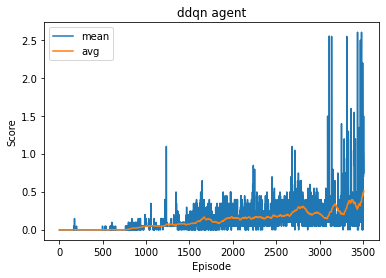

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(avgs)), avgs)
plt.title('ddqn agent')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(['mean','avg'])
plt.show()

In [ ]:
env.close()

![SegmentLocal](plots/Tennis_DDPG.gif "segment")